In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
g1 = pd.DataFrame(np.random.randint(80,100,(40000,5)),columns = ['g1','g2','g3','g4','g5'])
g2 = pd.DataFrame(np.random.randint(70,80,(40000,5)),columns = ['g1','g2','g3','g4','g5'])
g3 = pd.DataFrame(np.random.randint(60,70,(40000,5)),columns = ['g1','g2','g3','g4','g5'])
g4 = pd.DataFrame(np.random.randint(50,60,(40000,5)),columns = ['g1','g2','g3','g4','g5'])
g5 = pd.DataFrame(np.random.randint(0,50,(40000,5)),columns = ['g1','g2','g3','g4','g5'])
df = pd.concat([g1,g2,g3,g4,g5])
df = df.drop_duplicates()
len(df)
df

,g1,g2,g3,g4,g5
0,97,91,83,99,99
1,82,97,89,84,89
2,95,86,94,96,91
3,83,89,99,94,89
4,81,93,89,82,96
...,...,...,...,...,...
39995,18,38,32,24,1
39996,8,14,29,33,10
39997,20,3,41,26,37
39998,18,33,10,31,22


### Symbolic AI

In [3]:
def cal(a, b, c ,d ,e):
    total = 500
    obtained = a + b + c + d + e
    per = (obtained / total)*100
    grade = ''
    if (per <= 100 and per > 80):
        grade = "A+"
    elif (per <= 80 and per > 70):
        grade = "A"
    elif (per <= 70 and per > 60):
        grade = "B"
    elif (per <= 60 and per > 50):
        grade = "C"
    elif (per < 50):
        grade = "F"
    return obtained , per, grade  

In [4]:
df[["Obtained",'Percentage',"Grade"]] = df[['g1','g2','g3','g4','g5']].apply(lambda x:cal(x[0],x[1],x[2],x[3],x[4]),axis=1,result_type='expand')
df

,g1,g2,g3,g4,g5,Obtained,Percentage,Grade
0,97,91,83,99,99,469,93.8,A+
1,82,97,89,84,89,441,88.2,A+
2,95,86,94,96,91,462,92.4,A+
3,83,89,99,94,89,454,90.8,A+
4,81,93,89,82,96,441,88.2,A+
...,...,...,...,...,...,...,...,...
39995,18,38,32,24,1,113,22.6,F
39996,8,14,29,33,10,94,18.8,F
39997,20,3,41,26,37,127,25.4,F
39998,18,33,10,31,22,114,22.8,F


In [5]:
df.Grade.value_counts()

F     39999
A+    39738
B     33052
C     32987
A     32919
Name: Grade, dtype: int64

In [6]:
train = pd.DataFrame()
test = pd.DataFrame()
for i in df.Grade.unique():
    train= pd.concat([train,df[df.Grade == i].head(178393)])
    test = pd.concat([test,df[df.Grade == i].head(200)])
print(len(train))
print(len(test))

178695
1000


### DataFrame for ML

In [40]:
data = df[['g1','g2','g3','g4','g5','Percentage','Grade']].copy()

In [8]:
data = data.sample(frac = 1)
data

,g1,g2,g3,g4,g5,Percentage,Grade
31849,64,63,65,65,62,63.8,B
35841,76,75,79,74,77,76.2,A
33699,1,21,14,47,9,18.4,F
20487,60,67,62,69,68,65.2,B
33160,95,84,97,85,87,89.6,A+
...,...,...,...,...,...,...,...
2520,59,53,57,54,50,54.6,C
24816,65,68,60,63,60,63.2,B
15291,71,74,74,76,79,74.8,A
34779,71,70,71,71,75,71.6,A


In [9]:
data.corr()

,g1,g2,g3,g4,g5,Percentage
g1,1.000000,0.898427,0.899028,0.899477,0.898988,0.958725
g2,0.898427,1.000000,0.899019,0.899498,0.898860,0.958669
g3,0.899028,0.899019,1.000000,0.899166,0.899094,0.958791
g4,0.899477,0.899498,0.899166,1.000000,0.898840,0.958942
g5,0.898988,0.898860,0.899094,0.898840,1.000000,0.958701
Percentage,0.958725,0.958669,0.958791,0.958942,0.958701,1.000000


<AxesSubplot:>

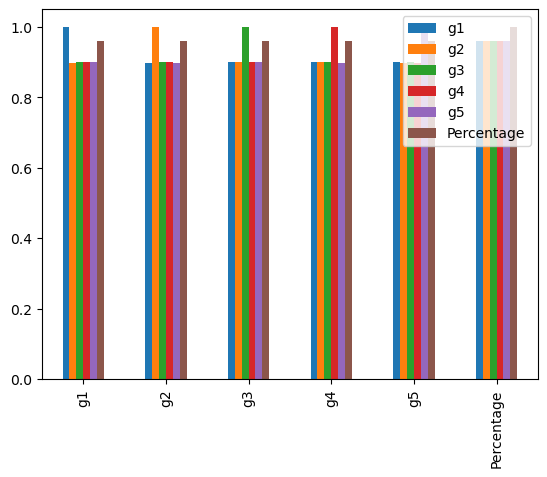

In [10]:
data.corr().plot.bar()

In [41]:
grade = {
    'A+':5,
    'A':4,
    'B':3,
    'C':2,
    'F':1
}
data['Grade1'] = data.Grade.map(grade)

In [42]:
data

,g1,g2,g3,g4,g5,Percentage,Grade,Grade1
0,97,91,83,99,99,93.8,A+,5
1,82,97,89,84,89,88.2,A+,5
2,95,86,94,96,91,92.4,A+,5
3,83,89,99,94,89,90.8,A+,5
4,81,93,89,82,96,88.2,A+,5
...,...,...,...,...,...,...,...,...
39995,18,38,32,24,1,22.6,F,1
39996,8,14,29,33,10,18.8,F,1
39997,20,3,41,26,37,25.4,F,1
39998,18,33,10,31,22,22.8,F,1


<AxesSubplot:>

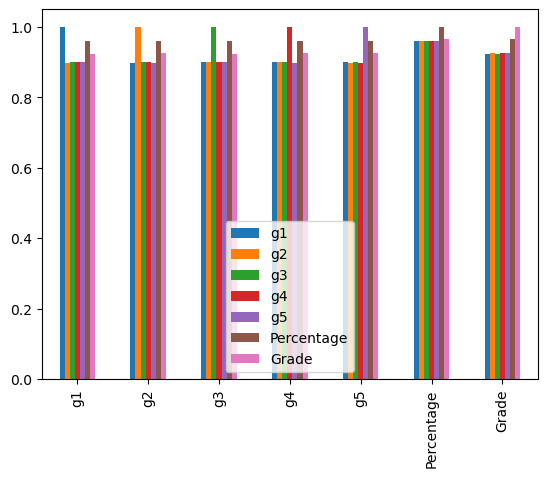

In [14]:
data.corr().plot.bar()

<AxesSubplot:>

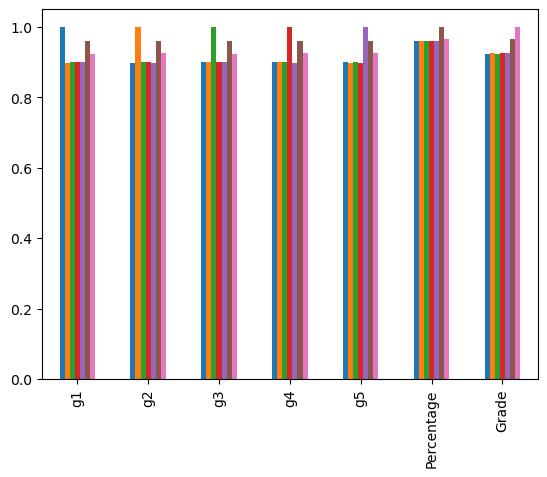

In [15]:
data.corr().plot.bar(legend = False)

In [20]:
data[['Percentage','Grade']].corr()

,Percentage,Grade
Percentage,1.000000,0.964214
Grade,0.964214,1.000000


## Training

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [51]:
feature = data.Percentage
X = feature
Y = data.Grade

In [52]:
print(X.head())
print(Y.head())

0    93.8
1    88.2
2    92.4
3    90.8
4    88.2
Name: Percentage, dtype: float64
0    A+
1    A+
2    A+
3    A+
4    A+
Name: Grade, dtype: object


### Test Train Split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [54]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

125086
125086
53609
53609


In [55]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [56]:
x_test

,Percentage
18959,17.6
14668,16.2
16193,64.8
36647,53.4
37118,75.8
...,...
26523,88.4
33661,62.0
5094,74.4
26898,55.6


## Prediction

In [57]:
y_predict = clf.predict(x_test)

In [58]:
y_predict

array(['F', 'F', 'B', ..., 'A', 'C', 'F'], dtype=object)

In [59]:
y_predict = pd.DataFrame(y_predict)

In [62]:
xtest = pd.DataFrame(x_test)
xtest

,Percentage
18959,17.6
14668,16.2
16193,64.8
36647,53.4
37118,75.8
...,...
26523,88.4
33661,62.0
5094,74.4
26898,55.6


In [63]:
comparasion = xtest.copy()

In [64]:
comparasion['y_Actual'] = y_test 

In [65]:
comparasion

,Percentage,y_Actual
18959,17.6,F
14668,16.2,F
16193,64.8,B
36647,53.4,C
37118,75.8,A
...,...,...
26523,88.4,A+
33661,62.0,B
5094,74.4,A
26898,55.6,C


In [66]:
comparasion['y_predicted'] = y_predict

In [67]:
comparasion

,Percentage,y_Actual,y_predicted
18959,17.6,F,F
14668,16.2,F,F
16193,64.8,B,A
36647,53.4,C,A
37118,75.8,A,B
...,...,...,...
26523,88.4,A+,A
33661,62.0,B,A
5094,74.4,A,F
26898,55.6,C,F


In [68]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      9747
          A+       1.00      1.00      1.00     11964
           B       1.00      1.00      1.00      9905
           C       1.00      1.00      1.00      9981
           F       1.00      1.00      1.00     12012

    accuracy                           1.00     53609
   macro avg       1.00      1.00      1.00     53609
weighted avg       1.00      1.00      1.00     53609



In [74]:
clf.predict([[6]])

C:\Users\hashi\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['F'], dtype=object)

In [75]:
clf.predict([[45]])

C:\Users\hashi\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['F'], dtype=object)